In [28]:
!pip install pycountry_convert
import pandas as pd
import matplotlib.pyplot as plot
import pycountry_convert as pc
import numpy as np


In [29]:
mn = pd.read_excel(r'E:\5502\HIV.xlsx',encoding = "ISO-8859-1")

In [30]:
continents = []

for country in mn['Estimated HIV Prevalence% - (Ages 15-49)']:
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continents.append(continent_name) 
    except:
        continents.append("Unknown")

In [31]:
mn['continents']=continents

mn_new=mn.iloc[:,[22,23,24,25,26,27,28,29,30,31,32,33]]
mn_new=(mn_new.sum(axis=1))/12
mn['Average']=mn_new
mn.to_csv("E:\\5502\\results.csv")

In [32]:
Highavg = mn.groupby(['continents']).apply(lambda t: t[t.Average == t.Average.max()])
lowavg = mn.groupby(['continents']).apply(lambda t : t[t.Average == t.Average.min()])

    Estimated HIV Prevalence% - (Ages 15-49)      1979  1980      1981  1982  \
155                                    Nauru       NaN   NaN       NaN   NaN   
254                                    Yemen       NaN   NaN       NaN   NaN   
95                                     Haiti  0.155026   NaN       NaN   NaN   
193                   St.-Pierre-et-Miquelon       NaN   NaN       NaN   NaN   
241                                  Uruguay  0.009697   NaN       NaN   NaN   
229                             Transnistria       NaN   NaN       NaN   NaN   
208                                  Somalia       NaN   NaN       NaN   NaN   
180                                 Portugal  0.020508   NaN       NaN   NaN   
162                                Nicaragua       NaN   NaN       NaN   NaN   
207                          Solomon Islands       NaN   NaN       NaN   NaN   
38                                Cape Verde       NaN   NaN       NaN   NaN   
84                                 Gibra

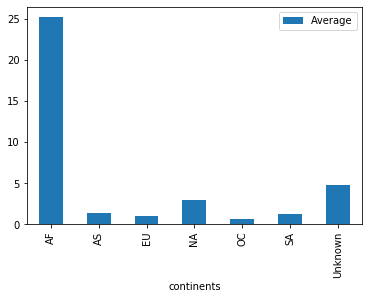

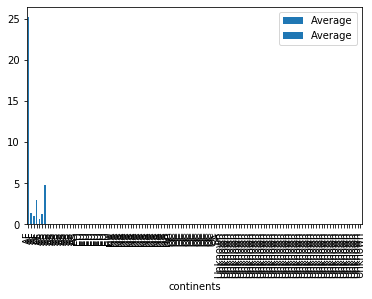

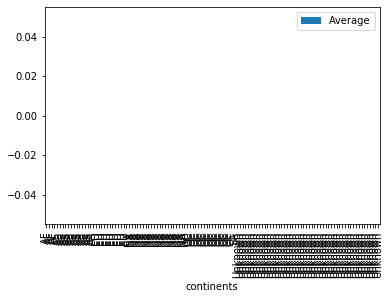

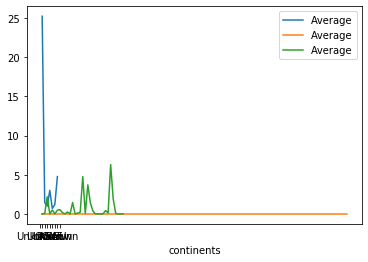

In [33]:
Highavg.plot(x='continents',y='Average',kind="bar")
ax=Highavg.plot(x='continents',y='Average',kind="bar")
lowavg.plot(x='continents',y='Average',kind="bar")
lowavg.plot(x='continents',y='Average',kind="bar",ax=ax)
mn1=mn.sample(frac=.12)
print(mn1)
bx=Highavg.plot(x='continents',y='Average',kind="line")
lowavg.plot(x='continents',y='Average',kind="line",ax=bx)
mn1.plot(x='continents',y='Average',kind="line",ax=bx)
plot.show()

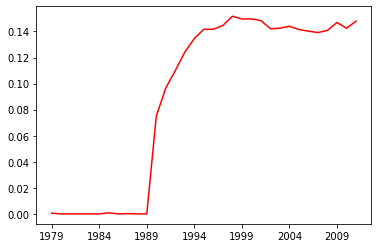

In [36]:
mn2=mn.groupby(['continents'])
asia=mn2.get_group('AS')
mnasia = asia.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mnasiaavg=(mnasia.sum(axis=0))/(len(asia))
mnasiaavg.plot(x='year',y='Average',color='red',kind='line')

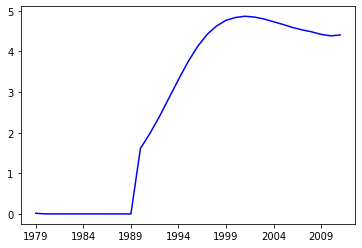

In [37]:
africa=mn2.get_group('AF')
mnafrica = africa.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mnafricaavg=(mnafrica.sum(axis=0))/(len(africa))
mnafricaavg.plot(x='year',y='Average',color='blue',kind='line')

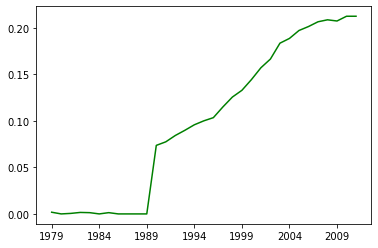

In [38]:
europe=mn2.get_group('EU')
mneurope = europe.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mneuropeavg=(mneurope.sum(axis=0))/(len(europe))
mneuropeavg.plot(x='year',y='Average',color='green',kind='line')

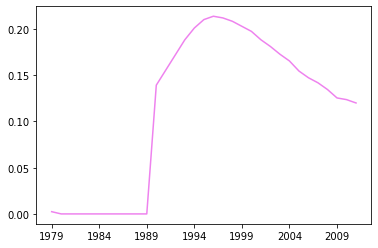

In [42]:
unknown=mn2.get_group('Unknown')
mnunknown = unknown.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mnunknownavg=(mnunknown.sum(axis=0))/(len(unknown))
mnunknownavg.plot(x='year',y='Average',color='violet',kind='line')

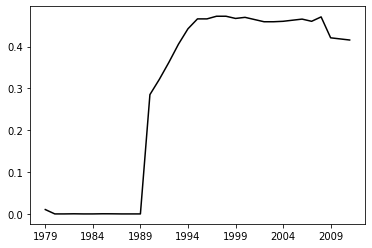

In [43]:
northamerica = mn2.get_group('NA')
mnna = northamerica.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mnnaavg=(mnna.sum(axis=0))/(len(northamerica))
mnnaavg.plot(x='year',y='Average',color='black',kind='line')

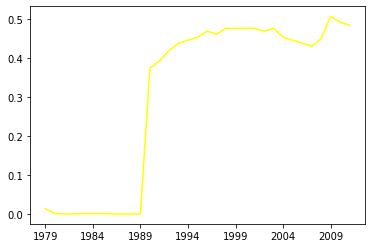

In [44]:
southamerica = mn2.get_group('SA')
mnsa = southamerica.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mnsaavg=(mnsa.sum(axis=0))/(len(southamerica))
mnsaavg.plot(x='year',y='Average',color='yellow',kind='line')

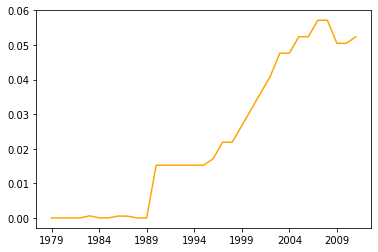

In [45]:
aus = mn2.get_group('OC')
mnaus = aus.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
mnausavg=(mnaus.sum(axis=0))/(len(aus))
mnausavg.plot(x='year',y='Average',color='orange',kind='line')

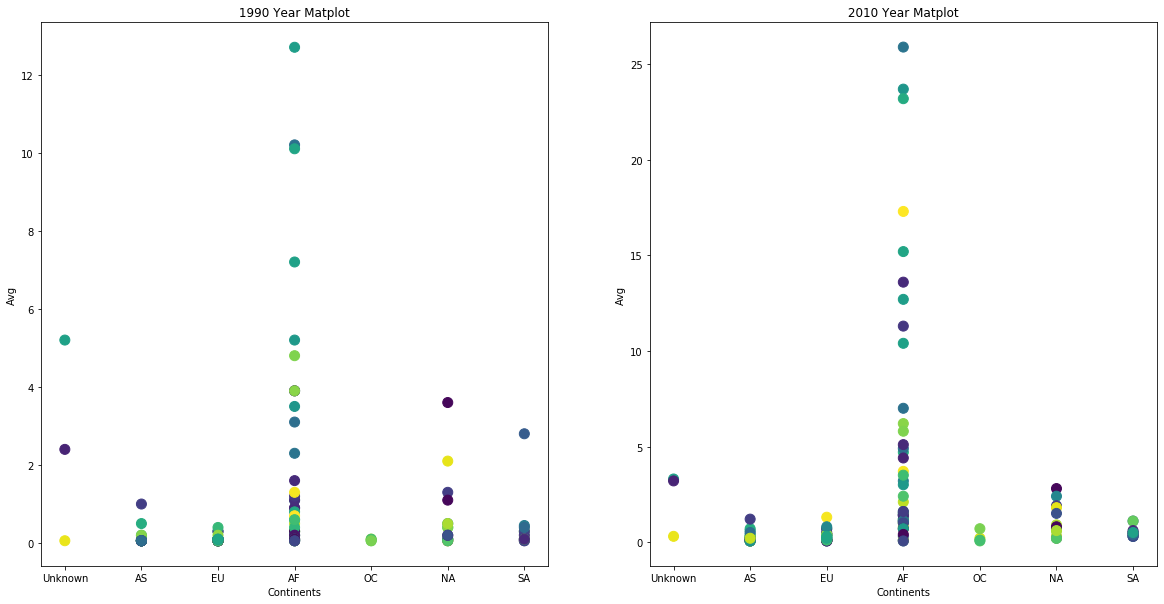

In [47]:
mn3=mn.groupby(['continents','Estimated HIV Prevalence% - (Ages 15-49)'],as_index=False).mean()
colors=np.random.RandomState(0)
co=colors.rand(275)
fig=plot.figure(figsize=(20,10))
sp1991=fig.add_subplot(1,2,1)
sp2010=fig.add_subplot(1,2,2)
sp1991.scatter(mn['continents'],mn[1990],s=100,c=co)
sp2010.scatter(mn['continents'],mn['2010'],s=100,c=co)
sp1991.set_xlabel("Continents")
sp1991.set_ylabel("Avg")
sp1991.set_title(" 1990 Year Matplot ")
sp2010.set_xlabel("Continents")
sp2010.set_ylabel("Avg")
sp2010.set_title(" 2010 Year Matplot ")
plot.show()